In [35]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [36]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [37]:
BATCH_SIZE=32
EPOCHS=10

train_dataset = datasets.MNIST(root='data/MNIST',train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='data/MNIST',train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE, shuffle=False)

In [38]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(),'type:',X_train.type())
    print('y_train:',y_train.size(), 'type:',y_train.type())

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: t

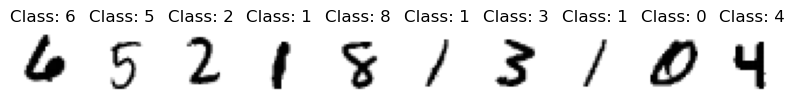

In [39]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize)) #10개 plot하기 위한 figure 크기 설정

for i in range(10):
    plt.subplot(1, 10, i + 1) # plot.subplot(rows, columns, index)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [40]:
class Net(nn.Module): # nn.Module은 모든 neural network의 base class라고 한다. 
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self,x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [41]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.5)
criterion=nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [42]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [43]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset)/ BATCH_SIZE)
    test_accuracy = 100. * correct/len(test_loader.dataset)
    return test_loss, test_accuracy

In [44]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        epoch, test_loss, test_accuracy))

Train epoch: 1 [0/60000 (0%)]	Train Loss: 2.299830
Train epoch: 1 [6400/60000 (11%)]	Train Loss: 2.282221
Train epoch: 1 [12800/60000 (21%)]	Train Loss: 2.295188
Train epoch: 1 [19200/60000 (32%)]	Train Loss: 2.314172
Train epoch: 1 [25600/60000 (43%)]	Train Loss: 2.297405
Train epoch: 1 [32000/60000 (53%)]	Train Loss: 2.257894
Train epoch: 1 [38400/60000 (64%)]	Train Loss: 2.288777
Train epoch: 1 [44800/60000 (75%)]	Train Loss: 2.241198
Train epoch: 1 [51200/60000 (85%)]	Train Loss: 2.205557
Train epoch: 1 [57600/60000 (96%)]	Train Loss: 2.196112

[EPOCH: 1], 	Test Loss: 2.2400, 	Test Accuracy: 28.40 %

Train epoch: 2 [0/60000 (0%)]	Train Loss: 2.243282
Train epoch: 2 [6400/60000 (11%)]	Train Loss: 2.172087
Train epoch: 2 [12800/60000 (21%)]	Train Loss: 2.200053
Train epoch: 2 [19200/60000 (32%)]	Train Loss: 2.127820
Train epoch: 2 [25600/60000 (43%)]	Train Loss: 2.000543
Train epoch: 2 [32000/60000 (53%)]	Train Loss: 1.991317
Train epoch: 2 [38400/60000 (64%)]	Train Loss: 1.744489
Tr